In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from tensorflow.keras.models import Sequential, Model

In [4]:
parasitized_cell_path= 'cell_images/Parasitized'
uninfected_cell_path= 'cell_images/Uninfected'
cell_data = 'C:/Users/sanik/OneDrive/ML/DL Mini project/cell_images'

In [5]:
parasitized_dir = os.listdir(parasitized_cell_path)
uninfected_dir = os.listdir(uninfected_cell_path)

print("Number of uninfected cells", len(uninfected_dir))
print("Number of parasitized cells", len(parasitized_dir))

Number of uninfected cells 13780
Number of parasitized cells 13780


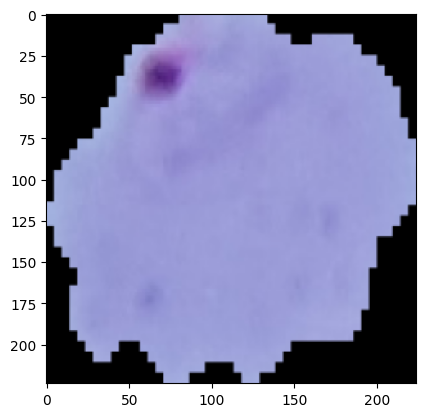

In [6]:
#sample image of parasitized cell
import cv2

img_path = os.path.join(parasitized_cell_path, parasitized_dir[102])
img1= cv2.imread(img_path)
plt.imshow(img1)

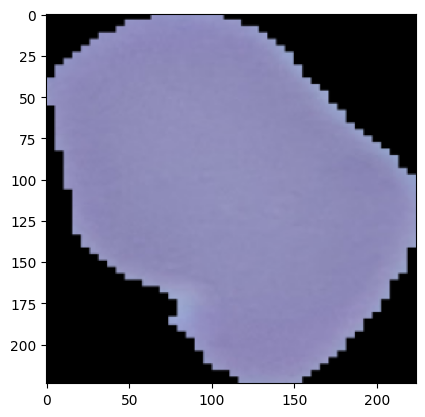

In [7]:
#sample image of uninfected cell
import cv2

img_path = os.path.join(uninfected_cell_path, uninfected_dir[1000])
img1= cv2.imread(img_path)
plt.imshow(img1)

Resizing the image

In [8]:
# Target size for resizing images
target_size = (224, 224)  

# Iterate through the images in the dataset directory
for filename in os.listdir(parasitized_cell_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        filepath = os.path.join(parasitized_cell_path, filename)
        # Read the image using OpenCV
        img = cv2.imread(filepath)
        # Resize the image
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)  
        # Save the resized image, overwrite the original if needed
        cv2.imwrite(filepath, resized_img)

print("Images resized successfully.")

Images resized successfully.


In [9]:
# Target size for resizing images
target_size = (224, 224)  

# Iterate through the images in the dataset directory
for filename in os.listdir(uninfected_cell_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        filepath = os.path.join(uninfected_cell_path, filename)
        # Read the image using OpenCV
        img = cv2.imread(filepath)
        # Resize the image
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)  
        # Save the resized image, overwrite the original if needed
        cv2.imwrite(filepath, resized_img)

print("Images resized successfully.")

Images resized successfully.


In [10]:
# Define the classes (parasitized and uninfected)
classes = ['parasitized', 'uninfected']

Dividing data into tarin and test 

In [11]:
# Create train and test folders
output_folder="Data_split"

train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [12]:
# # Iterate over the classes and split the data
from sklearn.model_selection import train_test_split
import shutil

for class_name in classes:
    class_folder = os.path.join(cell_data, class_name)
    
    # List all the images in the class folder
    images = os.listdir(class_folder)
    
    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create class-specific folders in train and test
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)
    
    # Move images to the respective folders
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_class_folder, image)
        shutil.copy(src_path, dest_path)
    
    for image in test_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(test_class_folder, image)
        shutil.copy(src_path, dest_path)

print("Dataset split and organized into train and test folders.")


Dataset split and organized into train and test folders.


In [13]:
train_path='Data_split/test'
test_path='Data_split/train'

In [14]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

ImageDataGenerator class provides utilities to read images from a directory, preprocess them, and create batches of augmented data for training deep learning models.
The rescale parameter is used to rescale the pixel values of images to the range [0,1] by dividing each pixel value by 255.

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)# Create an instance of the ImageDataGenerator with resizing

train_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 subset='training'
                                                )

val_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=False,
                                                 subset='validation'
                                                 )

test_generator  = ImageDataGenerator(rescale=1./255)

test_data = test_generator.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",shuffle=False,
                                                 batch_size=BATCH_SIZE)

Found 4408 images belonging to 2 classes.
Found 1102 images belonging to 2 classes.
Found 22048 images belonging to 2 classes.


Visualizing the images

In [35]:
# Assuming train_data is your training generator
class_names = list(train_data.class_indices.keys())
print("Class Names:", class_names)

Class Names: ['parasitized', 'uninfected']
